In [1]:
import drjit as dr
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
from PDE2D.Sampling.sampling_wos import *


In [2]:
num_points = 1000
threshold = Float(dr.pi * 0.49)
t = dr.arange(Float, num_points) / num_points * dr.pi/2 

In [3]:
pdf = pdf_sec_angle(t, threshold)
n = 1000000
pcg = PCG32(initstate=dr.arange(UInt32, n))
sample = pcg.next_float32()
sampled = sample_sec_angle(sample, threshold)

In [4]:
dr.sum(pdf) * dr.pi /2 / num_points

[0.995358]

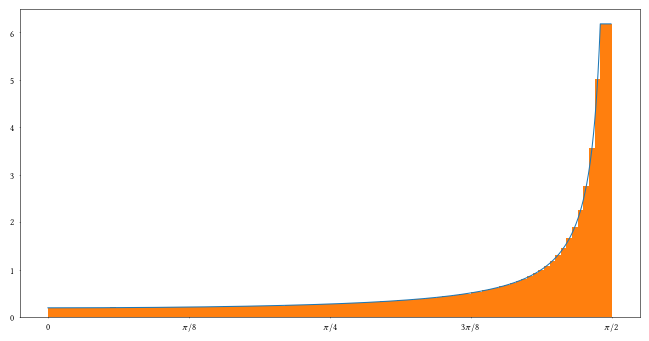

In [5]:
fig, ax = plt.subplots(1,1,figsize = (8,4))
ax.plot(t.numpy(), pdf.numpy())
ax.set_xticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2])
ax.set_xticklabels(["0",r"$\pi/8$",r"$\pi/4$", r"$3\pi/8$", r"$\pi/2$" ])
ax.hist(sampled.numpy(), density = True, bins = 100);